# Домашнее задание №1
  
  
Основы машинного обучения. В.Журавлев  
__Группа ML-11. Студент - Усцов Артем Алексеевич__  
(Максимум 5 баллов - по ~0.7 баллов за задание)

In [1]:
# Для функционирования watermark - раскомментируйте строку ниже, либо установите библиотеку в консоли вручную
# !pip install watermark
%load_ext watermark

In [2]:
%watermark -v -m -p numpy,scipy,matplotlib -g

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.28.0

numpy     : 1.20.1
scipy     : 1.6.2
matplotlib: 3.4.3

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.4.0-88-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Git hash: 82fd992d7106edaa2dbb9dfb5edce047a5d46661



In [3]:
# Main lib importing
import numpy as np

# For compatibility with future Python versions
from __future__ import division

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Main system library importing
import os

# Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.
Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3

In [4]:
# Check correct answer function
def wrapperSoluton_1(answer_1, answer_2, answer_3):
    if answer_1 == answer_2 == answer_3:
        print(f"EVERYTHING IS OK")
        print(f"\t1) Full_Vectorisation = {answer_1};\n\t2) Normal_Solution = {answer_2};\n\t3) Partial_Vectorisation = {answer_3}.")
    else:
        print(f"FAIL. THERE IS A MISTAKE")
        print(f"\t1) Full_Vectorisation = {answer_1};\n\t2) Normal_Solution = {answer_2};\n\t3) Partial_Vectorisation = {answer_3}.")

In [5]:
# Full vectorisation solution using only numpy.array methods
def full_vectorisation_1(X):
    return np.prod(np.diag(X)[np.diag(X)!= 0]) 

In [6]:
# Standard solution with using Python cycles
def normal_1(X):
    answer_2 = 1
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if i == j and X[i, j] != 0:
                answer_2 *= X[i, j]
    return answer_2

In [7]:
# Partial vectorisation with Python generetors
def partiral_vectorisation_1(X):
    return np.array([x for x in X.diagonal() if x != 0]).prod()

In [8]:
def solution_performace(X, full_vectorisation, normal, partiral_vectorisation, wrapperSoluton):
    
    print("Full vectorisation case: ")
    %timeit full_vectorisation(X)
    answer_1 = full_vectorisation(X)
    print()

    print("Normal case: ")
    %timeit normal(X)
    answer_2 = normal(X)
    print()

    print("Partial vectorisation case: ")
    %timeit partiral_vectorisation(X)
    answer_3 = partiral_vectorisation(X)
    print()

    wrapperSoluton(answer_1, answer_2, answer_3)

## Data generation

### Задание матрицы малого размера, базовый случай. Ответ: 3

In [9]:
X_small = np.array([[1, 0, 1], 
              [2, 0, 2], 
              [3, 0, 3], 
              [4, 4, 4]])
print("Матрица целых случайных чисел: \n", X_small, end='\n')
print("Вектор главной диагонали матрицы:\n", X_small.diagonal(), end='\n')

Матрица целых случайных чисел: 
 [[1 0 1]
 [2 0 2]
 [3 0 3]
 [4 4 4]]
Вектор главной диагонали матрицы:
 [1 0 3]


### Задание матрицы среднего размера.

In [10]:
np.random.seed(42)
X_average = np.random.randint(0, 7, size = (78, 19))
print("Матрица целых случайных чисел: \n", X_average, end='\n')
print("Вектор главной диагонали матрицы:\n", X_average.diagonal(), end='\n')

Матрица целых случайных чисел: 
 [[6 3 4 ... 5 4 1]
 [3 5 5 ... 6 1 3]
 [3 6 5 ... 0 6 1]
 ...
 [0 0 6 ... 1 0 2]
 [6 3 0 ... 2 2 5]
 [0 6 3 ... 6 0 3]]
Вектор главной диагонали матрицы:
 [6 5 5 5 3 5 0 6 0 4 5 0 5 1 6 2 5 2 5]


### Задание матрицы большого размера.

In [11]:
np.random.seed(42)
X_large = np.random.randint(0, 3, size = (212, 134))
print("Матрица целых случайных чисел: \n", X_large, end='\n')
print("Вектор главной диагонали матрицы:\n", X_large.diagonal(), end='\n')

Матрица целых случайных чисел: 
 [[2 0 2 ... 0 0 1]
 [2 2 1 ... 1 2 2]
 [1 0 0 ... 2 1 1]
 ...
 [2 2 0 ... 1 0 0]
 [2 0 2 ... 2 0 0]
 [1 1 1 ... 1 1 0]]
Вектор главной диагонали матрицы:
 [2 2 0 2 1 2 0 2 2 2 0 0 1 0 0 2 1 2 0 0 2 1 2 2 2 1 1 1 0 0 1 1 2 2 1 1 2
 0 2 2 1 2 1 1 2 0 1 0 2 1 2 0 1 2 0 0 1 2 2 0 1 0 2 1 0 2 2 0 1 2 1 0 2 2
 2 0 2 1 2 0 0 1 1 1 1 0 2 0 1 2 0 0 1 1 2 0 2 0 0 2 2 2 0 2 2 1 0 1 0 0 1
 2 1 2 2 1 1 1 1 2 2 1 0 2 1 1 0 2 1 1 2 2 1 2]


### Check the solution performance

In [12]:
solution_performace(X_small, full_vectorisation_1, normal_1, partiral_vectorisation_1, wrapperSoluton_1)

Full vectorisation case: 
11.7 µs ± 650 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Normal case: 
3.03 µs ± 246 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Partial vectorisation case: 
5.12 µs ± 354 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = 3;
	2) Normal_Solution = 3;
	3) Partial_Vectorisation = 3.


In [13]:
solution_performace(X_average, full_vectorisation_1, normal_1, partiral_vectorisation_1, wrapperSoluton_1)

Full vectorisation case: 
10.6 µs ± 504 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Normal case: 
63.8 µs ± 2.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Partial vectorisation case: 
7.8 µs ± 135 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = 4050000000;
	2) Normal_Solution = 4050000000;
	3) Partial_Vectorisation = 4050000000.


In [14]:
solution_performace(X_large, full_vectorisation_1, normal_1, partiral_vectorisation_1, wrapperSoluton_1)

Full vectorisation case: 
10.7 µs ± 200 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Normal case: 
835 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Partial vectorisation case: 
29.8 µs ± 521 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = 9007199254740992;
	2) Normal_Solution = 9007199254740992;
	3) Partial_Vectorisation = 9007199254740992.


## Conclusion

Как видно, в зависимости от размера входных данных для различных реализаций вычислений, время операций может варьироваться. На малых выборках не имеет значения, используются ли векторизованные вычисления или базовые конструкции Python.  
Векторизация начинает иметь все больший вес при увеличении данных. При этом выигрыш в вычислениях в случае большой выборки составляет почти 90 раз.  

__Также отметим, что частично векторизованное решение достаточно уступает векторизованному решению__

# Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

In [15]:
# Check correct answer function
def wrapperSoluton_2(answer_1, answer_2, answer_3):
    if np.array_equal(answer_1, answer_2) == np.array_equal(answer_1, answer_3) == np.array_equal(answer_2, answer_3):
        print(f"EVERYTHING IS OK")
        print(f"\t1) Full_Vectorisation = {answer_1};\n\t2) Normal_Solution = {answer_2};\n\t3) Partial_Vectorisation = {answer_3}.")
    else:
        print(f"FAIL. THERE IS A MISTAKE")
        print(f"\t1) Full_Vectorisation = {answer_1};\n\t2) Normal_Solution = {answer_2};\n\t3) Partial_Vectorisation = {answer_3}.")

In [16]:
def data_generation(matrix_size, vector_size):
    np.random.seed(42)
    X = np.random.randint(0, 10, size = (matrix_size, matrix_size))
    print("Матрица целых случайных чисел: \n", X, end='\n')

    # Задание первого вектора
    i = np.random.randint(0, len(X), size = vector_size)
    print("Первый вектор индексов: \n", i, end='\n')
    # Задание второго вектора
    j = np.random.randint(0, len(X), size = vector_size)
    print("Второй вектор индексов: \n", j, end='\n')
    
    return X, i, j

In [17]:
def solution_performace(X, i, j, full_vectorisation, normal, partiral_vectorisation, wrapperSoluton):
    
    print("Full vectorisation case: ")
    %timeit full_vectorisation(X, i, j)
    answer_1 = full_vectorisation(X, i, j)
    print()

    print("Normal case: ")
    %timeit normal(X, i, j)
    answer_2 = np.array(normal(X, i, j))
    print()

    print("Partial vectorisation case: ")
    %timeit partiral_vectorisation(X, i, j)
    answer_3 = np.array(partiral_vectorisation(X, i, j))
    print()

    wrapperSoluton(answer_1, answer_2, answer_3)

In [18]:
# Full vectorisation solution using only numpy.array methods
def full_vectorisation_2(X, i, j):
    return X[i,j]

In [19]:
# Standard solution with using Python cycles
def normal_2(X, i, j):
    answer = []
    for k in range(len(i)):
        answer.append(X[i[k]][j[k]])
    return answer

In [20]:
# Partial vectorisation with Python generetors
def partiral_vectorisation_2(X, i, j):
    return [X[i[k]][j[k]] for k in range(len(i))]

## Data generation

### Задание матрицы малого размера, базовый случай.

In [21]:
X_small, i_small, j_small = data_generation(4, 3)

Матрица целых случайных чисел: 
 [[6 3 7 4]
 [6 9 2 6]
 [7 4 3 7]
 [7 2 5 4]]
Первый вектор индексов: 
 [1 3 3]
Второй вектор индексов: 
 [1 1 1]


### Задание матрицы среднего размера

In [22]:
X_average, i_average, j_average = data_generation(27, 6)

Матрица целых случайных чисел: 
 [[6 3 7 4 6 9 2 6 7 4 3 7 7 2 5 4 1 7 5 1 4 0 9 5 8 0 9]
 [2 6 3 8 2 4 2 6 4 8 6 1 3 8 1 9 8 9 4 1 3 6 7 2 0 3 1]
 [7 3 1 5 5 9 3 5 1 9 1 9 3 7 6 8 7 4 1 4 7 9 8 8 0 8 6]
 [8 7 0 7 7 2 0 7 2 2 0 4 9 6 9 8 6 8 7 1 0 6 6 7 4 2 7]
 [5 2 0 2 4 2 0 4 9 6 6 8 9 9 2 6 0 3 3 4 6 6 3 6 2 5 1]
 [9 8 4 5 3 9 6 8 6 0 0 8 8 3 8 2 6 5 7 8 4 0 2 9 7 5 7]
 [8 3 0 0 9 3 6 1 2 0 4 0 7 0 0 1 1 5 6 4 0 0 2 1 4 9 5]
 [6 3 6 7 0 5 7 4 3 1 5 5 0 8 5 2 3 3 2 9 2 2 3 6 3 8 0]
 [7 6 1 7 0 8 8 1 6 9 2 6 9 8 3 0 1 0 4 4 6 8 8 2 2 2 3]
 [7 5 7 0 7 3 0 7 3 5 7 3 2 8 2 8 1 1 1 5 2 8 3 0 3 0 4]
 [3 7 7 6 2 0 0 2 5 6 5 5 5 2 5 7 1 4 0 0 4 2 3 2 0 0 4]
 [5 2 8 4 7 0 4 2 0 3 4 6 0 2 1 8 9 5 9 2 7 7 1 5 6 1 9]
 [1 9 0 7 0 8 5 6 9 6 9 2 1 8 7 9 6 8 3 3 0 7 2 6 1 1 6]
 [5 2 8 9 5 9 9 5 0 3 9 5 5 4 0 7 4 4 6 3 5 3 2 6 7 3 1]
 [9 2 0 7 2 9 6 9 4 9 4 6 8 4 0 9 9 0 1 5 8 7 4 0 6 4 5]
 [6 2 9 2 4 5 8 4 0 3 4 9 9 4 6 3 0 4 6 9 9 5 4 3 1 3 9]
 [9 2 9 0 7 4 3 7 6 1 0 3 7 1 2 0 0 2 4 2 0 0 7 9 1 2 1

### Задание матрицы большого размера

In [23]:
X_large, i_large, j_large = data_generation(101, 52)

Матрица целых случайных чисел: 
 [[6 3 7 ... 8 7 1]
 [0 6 6 ... 5 5 0]
 [8 5 2 ... 4 7 0]
 ...
 [5 2 1 ... 9 2 9]
 [4 2 4 ... 2 0 7]
 [5 8 2 ... 6 8 3]]
Первый вектор индексов: 
 [24 62 95 29 44 89 60 99 50 97  8 75  1  4 61 68 51 85  4 58 67  8 92 21
 26  9 79 60 50  9  5 61  4 69 62 55 58 62 88 58 50 49  3 47 31 50 51 98
 73 33 35 69]
Второй вектор индексов: 
 [42 15 58 52 18 97 88 94 40 80 46 93 53 54 94 18 61 98 92 58 64 67 27 17
 25 18 54 56  5  0  7 96 50 84 87 24 46 54 63 82 92  9 55 11 32 70 16 60
  9 30 59 69]


### Check the solution performance

In [25]:
solution_performace(X_small, i_small, j_small, 
                    full_vectorisation_2, normal_2, partiral_vectorisation_2, wrapperSoluton_2)

Full vectorisation case: 
1.07 µs ± 69.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

Normal case: 
1.97 µs ± 133 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Partial vectorisation case: 
1.97 µs ± 39.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = [9 2 2];
	2) Normal_Solution = [9 2 2];
	3) Partial_Vectorisation = [9 2 2].


In [26]:
solution_performace(X_average, i_average, j_average, 
                    full_vectorisation_2, normal_2, partiral_vectorisation_2, wrapperSoluton_2)

Full vectorisation case: 
1.13 µs ± 25.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

Normal case: 
3.47 µs ± 163 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Partial vectorisation case: 
3.29 µs ± 261 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = [2 5 4 7 0 3];
	2) Normal_Solution = [2 5 4 7 0 3];
	3) Partial_Vectorisation = [2 5 4 7 0 3].


In [27]:
solution_performace(X_large, i_large, j_large, 
                    full_vectorisation_2, normal_2, partiral_vectorisation_2, wrapperSoluton_2)

Full vectorisation case: 
1.49 µs ± 25.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

Normal case: 
25.1 µs ± 3.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Partial vectorisation case: 
23.5 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = [6 2 6 3 6 6 0 9 2 1 5 3 8 1 4 8 2 7 6 8 1 9 1 5 6 7 5 8 8 2 6 4 7 7 5 6 0
 4 1 1 7 0 5 4 6 1 3 5 5 7 1 9];
	2) Normal_Solution = [6 2 6 3 6 6 0 9 2 1 5 3 8 1 4 8 2 7 6 8 1 9 1 5 6 7 5 8 8 2 6 4 7 7 5 6 0
 4 1 1 7 0 5 4 6 1 3 5 5 7 1 9];
	3) Partial_Vectorisation = [6 2 6 3 6 6 0 9 2 1 5 3 8 1 4 8 2 7 6 8 1 9 1 5 6 7 5 8 8 2 6 4 7 7 5 6 0
 4 1 1 7 0 5 4 6 1 3 5 5 7 1 9].


## Conclusion

Как и в задании 1. Векторизованное решение выигрывает в разы по сравнению с другими. В данном случае, это правило распространяется на выборки любого размера

__Также отметим, что частично векторизованное решение достаточно уступает векторизованному решению__

# Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество. 
Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

"Мультимножество — модификация понятия множества, допускающая включение одного и того же элемента в совокупность по нескольку раз. Число элементов в мультимножестве, с учётом повторяющихся элементов, называется его размером или мощностью."

In [28]:
# Check correct answer function
def wrapperSoluton_3(answer_1, answer_2, answer_3):
    if answer_1 and answer_2 and answer_3:
        print(f"EVERYTHING IS OK")
        print(f"\t1) Full_Vectorisation = {answer_1};\n\t2) Normal_Solution = {answer_2};\n\t3) Partial_Vectorisation = {answer_3}.")
    else:
        print(f"FAIL. THERE IS A MISTAKE")
        print(f"\t1) Full_Vectorisation = {answer_1};\n\t2) Normal_Solution = {answer_2};\n\t3) Partial_Vectorisation = {answer_3}.")

In [29]:
def data_generation(vector_size_1, vector_size_2):

    # Задание первого вектора
    x = np.random.randint(0, 2, size = vector_size_1)
    print("Первый вектор индексов: \n", x, end='\n')
    # Задание второго вектора
    y = np.random.randint(0, 2, size = vector_size_2)
    print("Второй вектор индексов: \n", y, end='\n')
    
    return x, y

In [30]:
def solution_performace(x, y, full_vectorisation, normal, partiral_vectorisation, wrapperSoluton):
    
    print("Full vectorisation case: ")
    %timeit full_vectorisation(x, y)
    answer_1 = full_vectorisation(x, y)
    print()

    print("Normal case: ")
    %timeit normal(x, y)
    answer_2 = normal(x, y)
    print()

    print("Partial vectorisation case: ")
    %timeit partiral_vectorisation(x, y)
    answer_3 = partiral_vectorisation(x, y)
    print()

    wrapperSoluton(answer_1, answer_2, answer_3)

In [31]:
# Full vectorisation solution using only numpy.array methods
def full_vectorisation_3(x, y):
    x.sort()
    y.sort()
    return np.array_equal(x, y)

In [32]:
# Standard solution with using Python cycles
def normal_3(x, y):
    if len(x) != len(y):
        return False

    x.sort()
    y.sort()

    answer = False
    for i in range(len(x)):
        if x[i] == y[i]:
            answer = True
        else:
            answer = False
            break

    return answer

In [33]:
# Using collections.Counter
from collections import Counter
def partiral_vectorisation_3(x, y):
    if len(x) != len(y):
        return False

    x_counter, y_counter = Counter(), Counter()

    for x_digit, y_digit in zip(x, y):
        x_counter[x_digit] += 1
        y_counter[y_digit] += 1
    if x_counter == y_counter:
        return True
    else:
        return False

## Data generation

### Задание векторов малого размера

In [34]:
x_small, y_small = data_generation(5, 5)

Первый вектор индексов: 
 [0 1 0 1 1]
Второй вектор индексов: 
 [1 0 1 1 1]


### Задание векторов среднего размера

In [35]:
x_average, y_average = data_generation(29, 29)

Первый вектор индексов: 
 [1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1]
Второй вектор индексов: 
 [0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1]


### Задание векторов большого размера

In [36]:
x_large, y_large = data_generation(450, 450)

Первый вектор индексов: 
 [0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0
 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0
 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1
 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0
 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1
 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0
 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1
 1 1 1 0 1 1]
Второй вектор индексов: 
 [0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0

### Check the solution performance

In [37]:
solution_performace(x_small, y_small, 
                    full_vectorisation_3, normal_3, partiral_vectorisation_3, wrapperSoluton_3)

Full vectorisation case: 
5.42 µs ± 222 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Normal case: 
1.53 µs ± 165 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

Partial vectorisation case: 
6.4 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)

FAIL. THERE IS A MISTAKE
	1) Full_Vectorisation = False;
	2) Normal_Solution = False;
	3) Partial_Vectorisation = False.


In [38]:
solution_performace(x_average, y_average, 
                    full_vectorisation_3, normal_3, partiral_vectorisation_3, wrapperSoluton_3)

Full vectorisation case: 
5.8 µs ± 906 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Normal case: 
7.21 µs ± 332 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Partial vectorisation case: 
17.9 µs ± 1.69 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = True;
	2) Normal_Solution = True;
	3) Partial_Vectorisation = True.


In [39]:
solution_performace(x_large, y_large, 
                    full_vectorisation_3, normal_3, partiral_vectorisation_3, wrapperSoluton_3)

Full vectorisation case: 
9.46 µs ± 465 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Normal case: 
44 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Partial vectorisation case: 
216 µs ± 1.75 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

FAIL. THERE IS A MISTAKE
	1) Full_Vectorisation = False;
	2) Normal_Solution = False;
	3) Partial_Vectorisation = False.


## Conclusion

Аналогичная ситуация. Векторизованные методы отрабатывают быстрее невекторизованных. 
Использование модуля collections.Counter сильно замедляет работу в вычислениях.

__Примечание__  
В изначальном варианте векторизованного решения в метод np.array_equal передавались не заранее отсортированные массивы, а массивы, обертнутые в функци sorted(), т.е np.array_equal(sorted(X), sorted(Y)). Такое решение было в дальнейшем отвергнуто, в связи с большим падением скорости в вычислениях, получилась, что невекторизованное решение было в 2-3 раза эффективнее векторизованного.

# Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. 
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [40]:
# Check correct answer function
def wrapperSoluton_4(answer_1, answer_2, answer_3):
    if answer_1 == answer_2 == answer_3:
        print(f"EVERYTHING IS OK")
        print(f"\t1) Full_Vectorisation = {answer_1};\n\t2) Normal_Solution = {answer_2};\n\t3) Partial_Vectorisation = {answer_3}.")
    else:
        print(f"FAIL. THERE IS A MISTAKE")
        print(f"\t1) Full_Vectorisation = {answer_1};\n\t2) Normal_Solution = {answer_2};\n\t3) Partial_Vectorisation = {answer_3}.")

In [41]:
def data_generation(vector_size):

    # Задание вектор
    x = np.random.randint(0, 12, size = vector_size)
    print("Первый вектор индексов: \n", x, end='\n')

    return x

In [42]:
def solution_performace(x, full_vectorisation, normal, partiral_vectorisation, wrapperSoluton):
    
    print("Full vectorisation case: ")
    %timeit full_vectorisation(x)
    answer_1 = full_vectorisation(x)
    print()

    print("Normal case: ")
    %timeit normal(x)
    answer_2 = normal(x)
    print()

    print("Partial vectorisation case: ")
    %timeit partiral_vectorisation(x)
    answer_3 = partiral_vectorisation(x)
    print()

    wrapperSoluton(answer_1, answer_2, answer_3)

In [43]:
# Full vectorisation solution using only numpy.array methods
def full_vectorisation_4(x):
# Create a zero_mask
    zero_mask = (x==0)
    max_after_zero = x[1:][zero_mask[:-1]].max()
    return max_after_zero

In [44]:
# Standard solution with using Python cycles
def normal_4(x):
    max_after_zero = -float("inf")
    for i in range(len(x)-1):
        if (x[i] == 0) and (x[i+1] > max_after_zero):
            max_after_zero = x[i+1]
    return max_after_zero

In [45]:
# Using Python generators
def partiral_vectorisation_4(x):
    max_after_zero = max(x[i] for i in range(1, len(x)) if not x[i-1])
    return max_after_zero

## Data generation

### Задание вектора малого размера

In [46]:
x_small = data_generation(5)

Первый вектор индексов: 
 [ 9  2 11  0 11]


### Задание вектора среднего размера

In [47]:
x_average = data_generation(23)

Первый вектор индексов: 
 [ 2  4  6  3 10 10  0  5  1 11  2  3  5  5  6  4  6  1  0 11  9  7  0]


### Задание вектора большого размера

In [48]:
x_large = data_generation(101)

Первый вектор индексов: 
 [11  1 10 11  9  5  0  9  2  6 11  7  3 11  2  0 11  8  9  5  5  8  0  5
 11  4 10  5 10  7  4  1 11 11  1  9  4  2  9  2  7  6  0 11 11  4  8  3
  0  7  4  1 11  0 11 11 11  2  8  0  3  7  7  9 11 10 10  7  9  7  3  7
  8  6 11  1  8 10  7  4 11  2  6  1  2 11  8  3  3  2  4  2  8  2  1 11
  4  5  0 11 10]


### Check the solution performance

In [49]:
solution_performace(x_small, 
                    full_vectorisation_4, normal_4, partiral_vectorisation_4, wrapperSoluton_4)

Full vectorisation case: 
3.69 µs ± 177 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Normal case: 
2.56 µs ± 60.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Partial vectorisation case: 
1.16 µs ± 71.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = 11;
	2) Normal_Solution = 11;
	3) Partial_Vectorisation = 11.


In [50]:
solution_performace(x_average, 
                    full_vectorisation_4, normal_4, partiral_vectorisation_4, wrapperSoluton_4)

Full vectorisation case: 
4.64 µs ± 858 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Normal case: 
8.37 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Partial vectorisation case: 
3.55 µs ± 488 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = 11;
	2) Normal_Solution = 11;
	3) Partial_Vectorisation = 11.


In [51]:
solution_performace(x_large, 
                    full_vectorisation_4, normal_4, partiral_vectorisation_4, wrapperSoluton_4)

Full vectorisation case: 
5.55 µs ± 386 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Normal case: 
33.6 µs ± 4.85 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Partial vectorisation case: 
15 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = 11;
	2) Normal_Solution = 11;
	3) Partial_Vectorisation = 11.


## Conclusion

Аналогичная ситуация c задачами выше. Векторизованные методы отрабатывают быстрее невекторизованных. 

# Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. 
- Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width).  
- Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114])

"imread" is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.

## Data generation

In [52]:
from matplotlib import pylab as plt
import matplotlib.image as pltimg

### Задание изображения с малым количеством пикселей

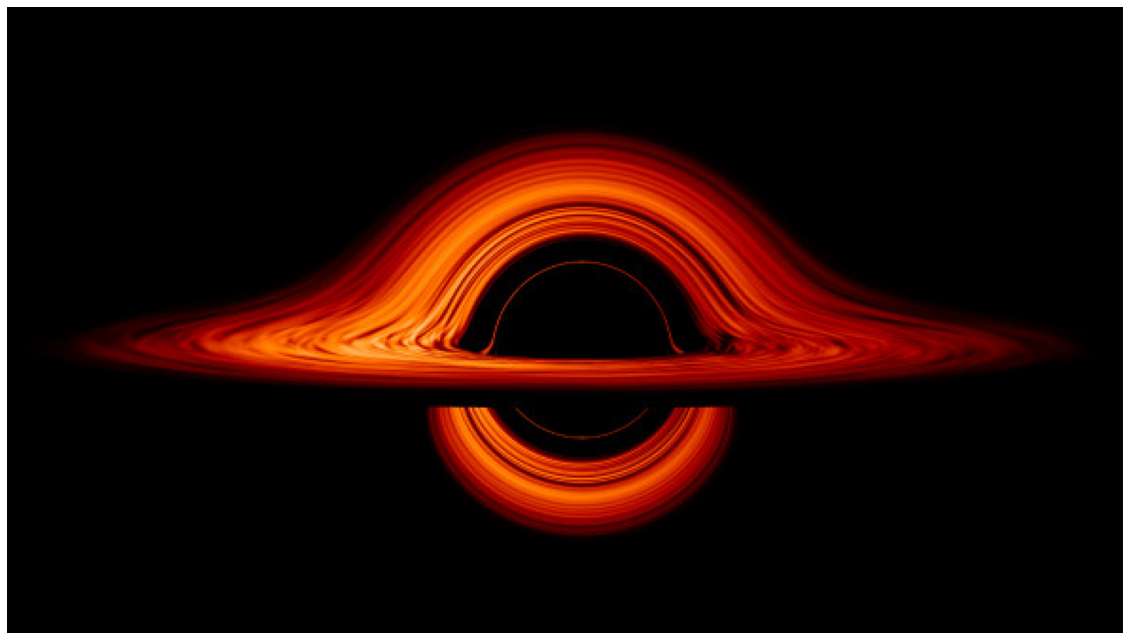

In [54]:
plt.figure(figsize=(20, 15))
im_small_pixel_colors = pltimg.imread('./data/Black_Hole.jpg')
plt.imshow(im_small_pixel_colors)
plt.axis('off')
plt.show()

In [58]:
im_small_pixel_colors.shape

(331, 590, 3)

### Задание изображения со средним количеством пикселей

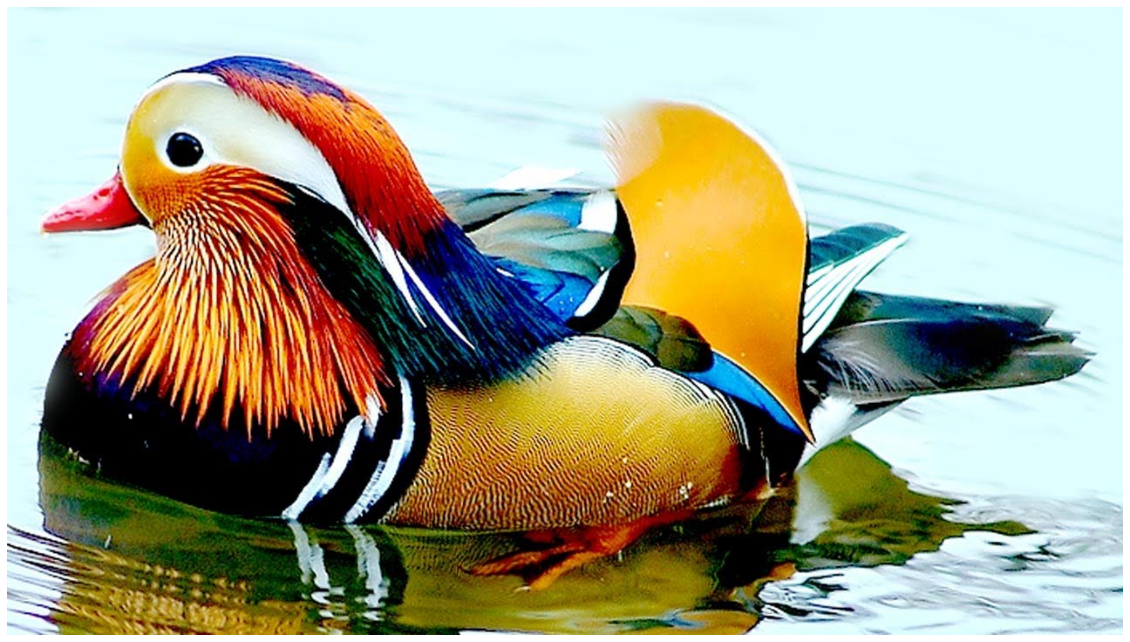

In [55]:
plt.figure(figsize=(20, 15))
im_average_pixel_colors = pltimg.imread('./data/Mandarin_Duck.jpg')
plt.imshow(im_average_pixel_colors)
plt.axis('off')
plt.show()

In [59]:
im_average_pixel_colors.shape

(720, 1280, 3)

### Задание изображения с большим количеством пикселей

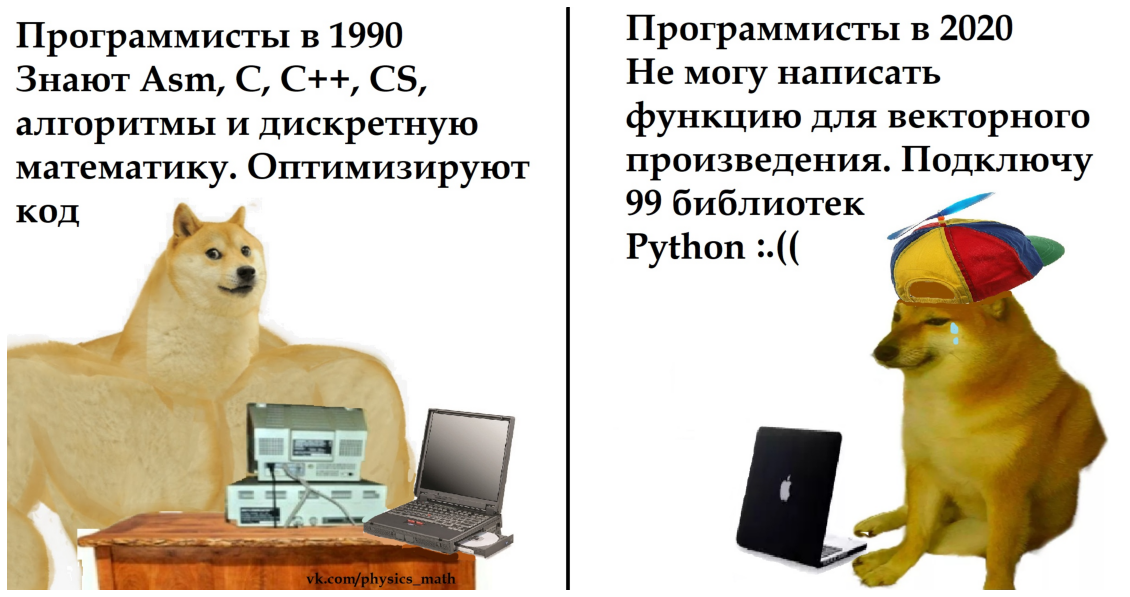

In [56]:
plt.figure(figsize=(20, 15))
im_large_pixel_colors = pltimg.imread('./data/Siba-Inu.jpg')
plt.imshow(im_large_pixel_colors)
plt.axis('off')
plt.show()

In [60]:
im_large_pixel_colors.shape

(1269, 2429, 3)

## Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114])
[Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width)].

In [61]:
# Full vectorisation solution using only numpy.array methods
def full_vectorisation_6(rgb, gray_filter=[0.299, 0.587, 0.114]): 
    return np.dot(rgb[...,:3], gray_filter) 

In [62]:
# Standard solution with using Python cycles
def normal_6(rgb, gray_filter=[0.299, 0.587, 0.114]):
    # multiplying by gray filter
    for k in range(rgb.shape[2]):
        for i in range(rgb.shape[0]):
            for j in range(rgb.shape[1]):
                rgb[i][j][k] = rgb[i][j][k] * gray_filter[k]
    
    #create 2-d array
    answer = []
    for i in range(rgb.shape[0]):
        row = []
        for j in range(rgb.shape[1]):
            row.append(0.0)
        answer.append(row)

    answer = np.array(answer)
    
    #summing arrays
    for k in range(rgb.shape[2]):
        for i in range(rgb.shape[0]):
            for j in range(rgb.shape[1]):
                answer[i][j] += rgb[i][j][k]
    
    return answer

In [63]:
# Using Python slicers, tuples and definition of gray channel mapping function
def partial_vectorisation_6(rgb, gray_filter=[0.299, 0.587, 0.114]): 
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    # gray channel mapping function
    gray = gray_filter[0] * r + gray_filter[1] * g + gray_filter[2] * b 
    return gray

### Check the solution performance

In [64]:
import copy

In [65]:
# Check correct answer function
def wrapperSoluton_6(answer_1, answer_2, answer_3):
    if np.array_equal(answer_1, answer_2) == np.array_equal(answer_1, answer_3) == np.array_equal(answer_2, answer_3):
        print(f"EVERYTHING IS OK")
        print(f"\t1) Full_Vectorisation = {answer_1};\n\t2) Normal_Solution = {answer_2};\n\t3) Partial_Vectorisation = {answer_3}.")
    else:
        print(f"FAIL. THERE IS A MISTAKE")
        print(f"\t1) Full_Vectorisation = {answer_1};\n\t2) Normal_Solution = {answer_2};\n\t3) Partial_Vectorisation = {answer_3}.")

In [66]:
def solution_performace(_x, full_vectorisation, normal, partial_vectorisation, wrapperSoluton):
    x = copy.deepcopy(_x)
    print("Full vectorisation case: ")
    %timeit full_vectorisation(x)
    answer_1 = full_vectorisation(x)
    print()

    print("Normal case: ")
    %timeit normal(x)
    answer_2 = normal(x)
    print()

    print("Partial vectorisation case: ")
    %timeit partial_vectorisation(x)
    answer_3 = partial_vectorisation(x)
    print()

In [67]:
solution_performace(np.array(im_small_pixel_colors, dtype=np.float), 
                    full_vectorisation_6, normal_6, partial_vectorisation_6, wrapperSoluton_6)

Full vectorisation case: 
4.3 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Normal case: 
768 ms ± 78.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Partial vectorisation case: 
1.71 ms ± 224 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



In [70]:
answer_1 = full_vectorisation_6(np.array(im_small_pixel_colors, dtype=np.float))
answer_2 = normal_6(np.array(im_small_pixel_colors, dtype=np.float))
answer_3 = partial_vectorisation_6(np.array(im_small_pixel_colors, dtype=np.float))

### Checking raw data matrix. Small

In [72]:
wrapperSoluton_6(answer_1, answer_2, answer_3)

EVERYTHING IS OK
	1) Full_Vectorisation = [[3. 1. 0. ... 0. 1. 3.]
 [3. 1. 0. ... 0. 1. 3.]
 [3. 1. 0. ... 0. 1. 3.]
 ...
 [3. 1. 0. ... 0. 1. 3.]
 [3. 1. 0. ... 0. 1. 3.]
 [3. 1. 0. ... 0. 1. 3.]];
	2) Normal_Solution = [[3. 1. 0. ... 0. 1. 3.]
 [3. 1. 0. ... 0. 1. 3.]
 [3. 1. 0. ... 0. 1. 3.]
 ...
 [3. 1. 0. ... 0. 1. 3.]
 [3. 1. 0. ... 0. 1. 3.]
 [3. 1. 0. ... 0. 1. 3.]];
	3) Partial_Vectorisation = [[3. 1. 0. ... 0. 1. 3.]
 [3. 1. 0. ... 0. 1. 3.]
 [3. 1. 0. ... 0. 1. 3.]
 ...
 [3. 1. 0. ... 0. 1. 3.]
 [3. 1. 0. ... 0. 1. 3.]
 [3. 1. 0. ... 0. 1. 3.]].


### Checking images quality. Small

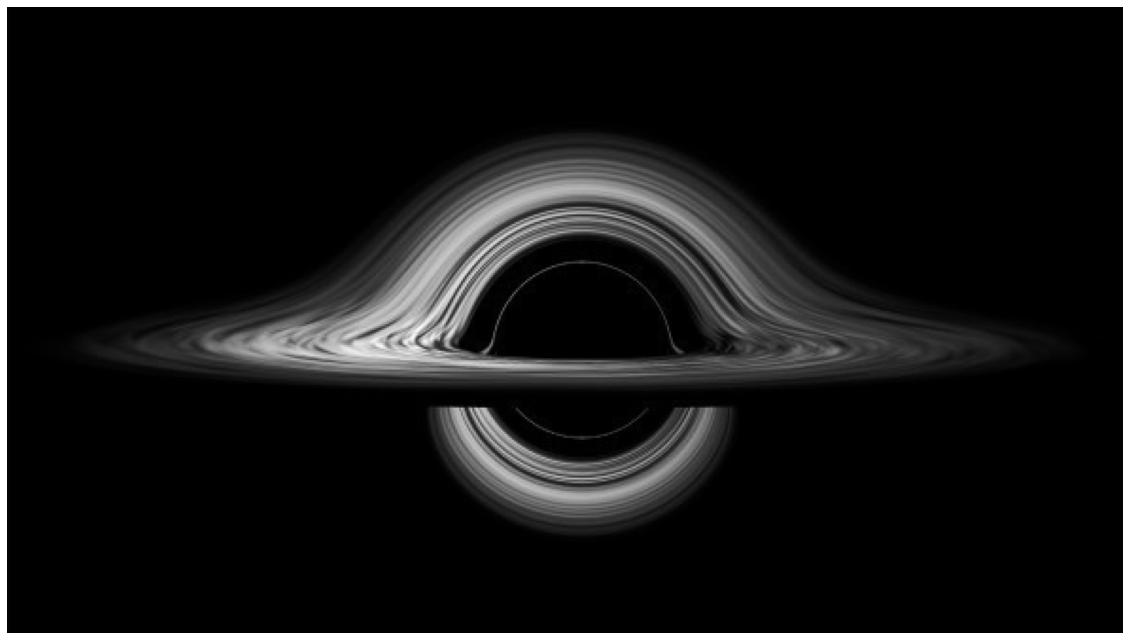

In [73]:
plt.figure(figsize=(20, 15))
plt.imshow(answer_1, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

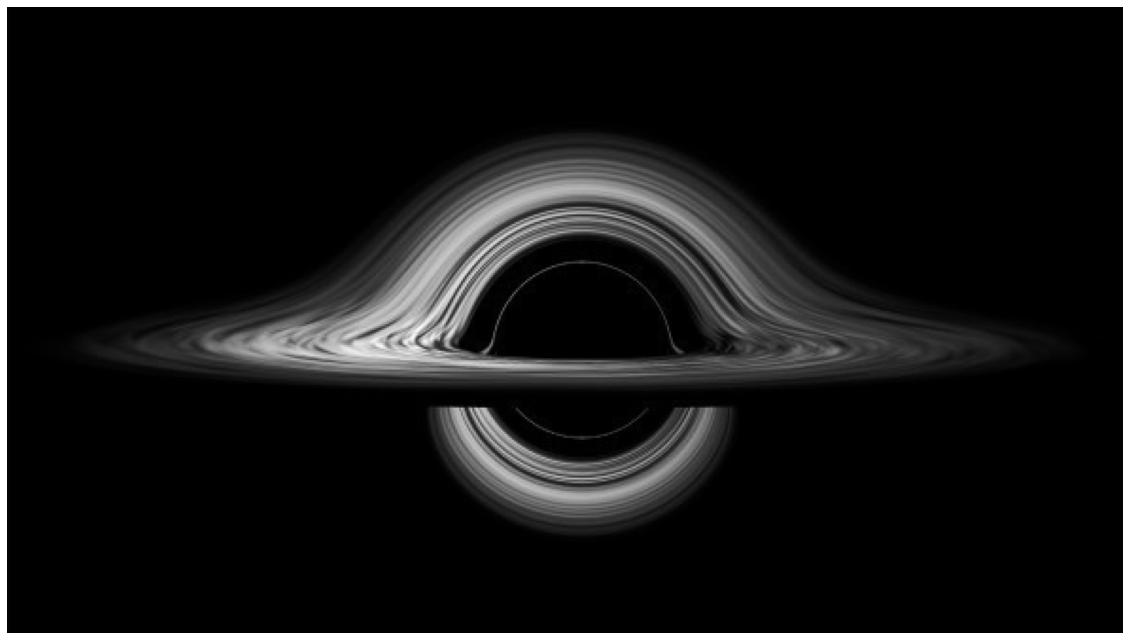

In [74]:
plt.figure(figsize=(20, 15))
plt.imshow(answer_2, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

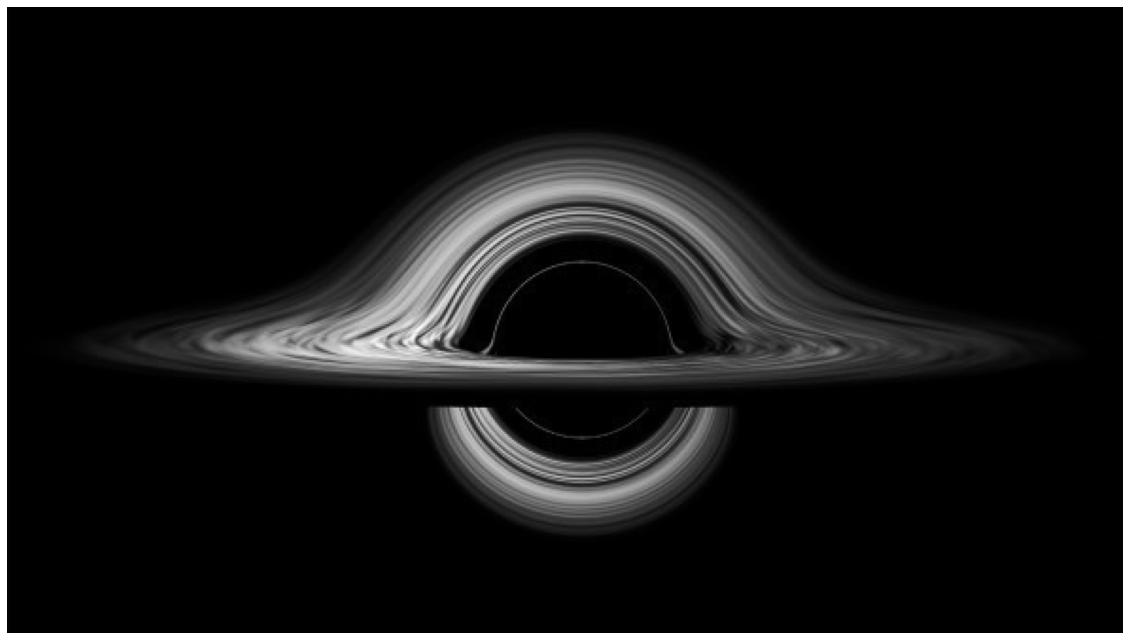

In [75]:
plt.figure(figsize=(20, 15))
plt.imshow(answer_3, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [76]:
solution_performace(np.array(im_average_pixel_colors, dtype=np.float), 
                    full_vectorisation_6, normal_6, partial_vectorisation_6, wrapperSoluton_6)

Full vectorisation case: 
21.2 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Normal case: 
4.01 s ± 326 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Partial vectorisation case: 
7.61 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [78]:
answer_1 = full_vectorisation_6(np.array(im_average_pixel_colors, dtype=np.float))
answer_2 = normal_6(np.array(im_average_pixel_colors, dtype=np.float))
answer_3 = partial_vectorisation_6(np.array(im_average_pixel_colors, dtype=np.float))

### Checking raw data matrix. Average

In [79]:
wrapperSoluton_6(answer_1, answer_2, answer_3)

EVERYTHING IS OK
	1) Full_Vectorisation = [[244.258 244.258 244.258 ... 243.959 243.959 243.959]
 [244.258 244.258 244.258 ... 243.959 243.959 243.959]
 [244.258 244.258 244.258 ... 243.959 243.959 243.959]
 ...
 [245.753 245.753 245.753 ... 247.824 247.824 247.824]
 [245.742 245.742 245.742 ... 244.291 244.59  245.177]
 [245.742 245.742 245.742 ... 236.818 237.818 238.818]];
	2) Normal_Solution = [[244.258 244.258 244.258 ... 243.959 243.959 243.959]
 [244.258 244.258 244.258 ... 243.959 243.959 243.959]
 [244.258 244.258 244.258 ... 243.959 243.959 243.959]
 ...
 [245.753 245.753 245.753 ... 247.824 247.824 247.824]
 [245.742 245.742 245.742 ... 244.291 244.59  245.177]
 [245.742 245.742 245.742 ... 236.818 237.818 238.818]];
	3) Partial_Vectorisation = [[244.258 244.258 244.258 ... 243.959 243.959 243.959]
 [244.258 244.258 244.258 ... 243.959 243.959 243.959]
 [244.258 244.258 244.258 ... 243.959 243.959 243.959]
 ...
 [245.753 245.753 245.753 ... 247.824 247.824 247.824]
 [245.742

### Checking images quality. Average

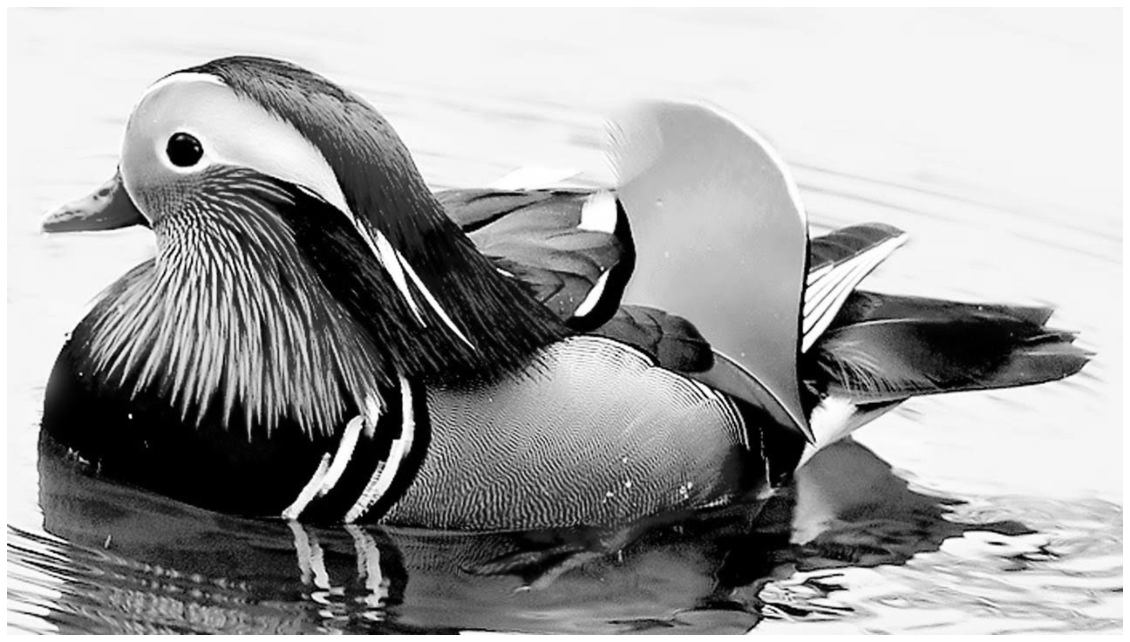

In [80]:
plt.figure(figsize=(20, 15))
plt.imshow(answer_1, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

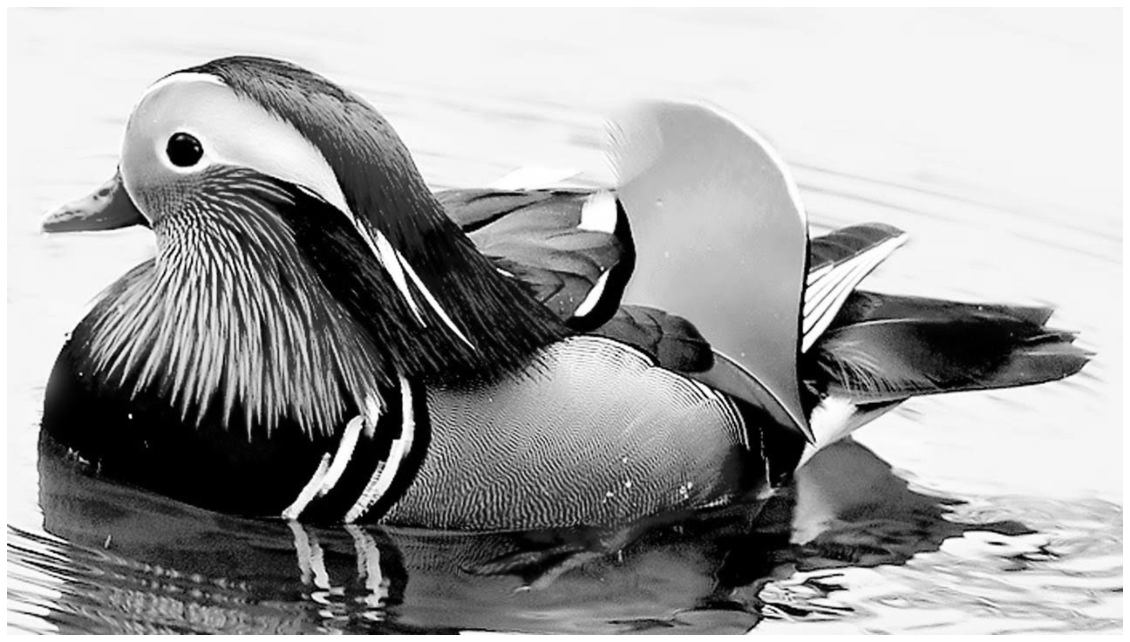

In [81]:
plt.figure(figsize=(20, 15))
plt.imshow(answer_2, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

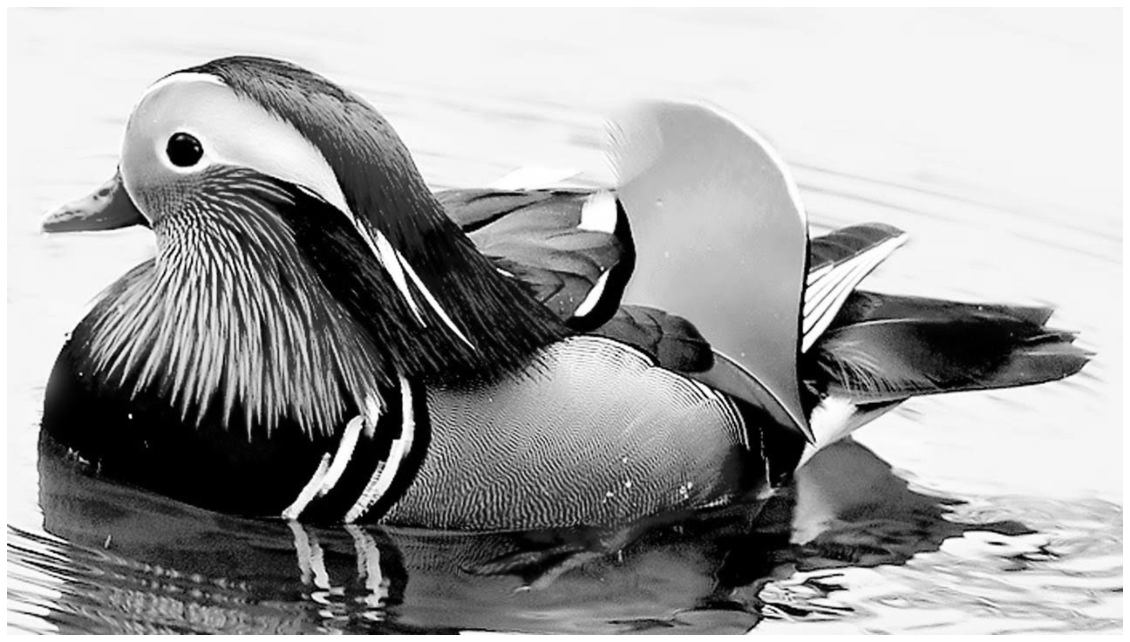

In [82]:
plt.figure(figsize=(20, 15))
plt.imshow(answer_3, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [83]:
solution_performace(np.array(im_large_pixel_colors, dtype=np.float), 
                    full_vectorisation_6, normal_6, partial_vectorisation_6, wrapperSoluton_6)

Full vectorisation case: 
68.7 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Normal case: 
14.1 s ± 776 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Partial vectorisation case: 
40.7 ms ± 5.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)



In [84]:
answer_1 = full_vectorisation_6(np.array(im_large_pixel_colors, dtype=np.float))
answer_2 = normal_6(np.array(im_large_pixel_colors, dtype=np.float))
answer_3 = partial_vectorisation_6(np.array(im_large_pixel_colors, dtype=np.float))

### Checking raw data matrix. Large

In [86]:
wrapperSoluton_6(answer_1, answer_2, answer_3)

EVERYTHING IS OK
	1) Full_Vectorisation = [[255.    255.    255.    ... 255.    255.    255.   ]
 [255.    255.    255.    ... 255.    255.    255.   ]
 [255.    255.    255.    ... 255.    255.    255.   ]
 ...
 [183.166 183.166 183.166 ... 255.    255.    255.   ]
 [183.166 183.166 183.166 ... 255.    255.    255.   ]
 [183.166 183.166 183.166 ... 255.    255.    255.   ]];
	2) Normal_Solution = [[255.    255.    255.    ... 255.    255.    255.   ]
 [255.    255.    255.    ... 255.    255.    255.   ]
 [255.    255.    255.    ... 255.    255.    255.   ]
 ...
 [183.166 183.166 183.166 ... 255.    255.    255.   ]
 [183.166 183.166 183.166 ... 255.    255.    255.   ]
 [183.166 183.166 183.166 ... 255.    255.    255.   ]];
	3) Partial_Vectorisation = [[255.    255.    255.    ... 255.    255.    255.   ]
 [255.    255.    255.    ... 255.    255.    255.   ]
 [255.    255.    255.    ... 255.    255.    255.   ]
 ...
 [183.166 183.166 183.166 ... 255.    255.    255.   ]
 [183.166

### Checking images quality. Large

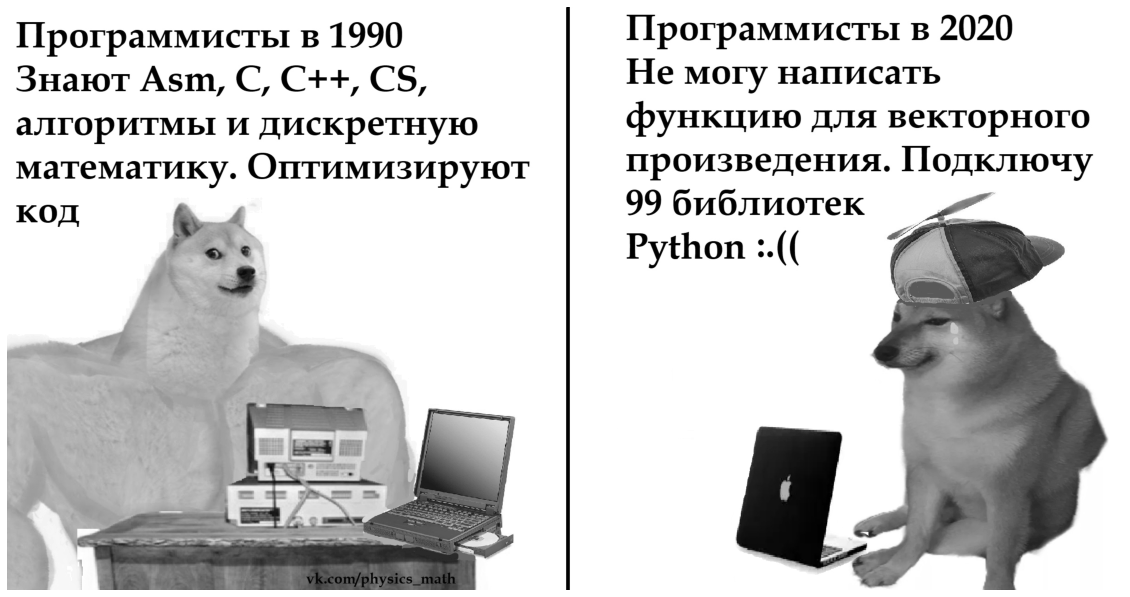

In [87]:
plt.figure(figsize=(20, 15))
plt.imshow(answer_1, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

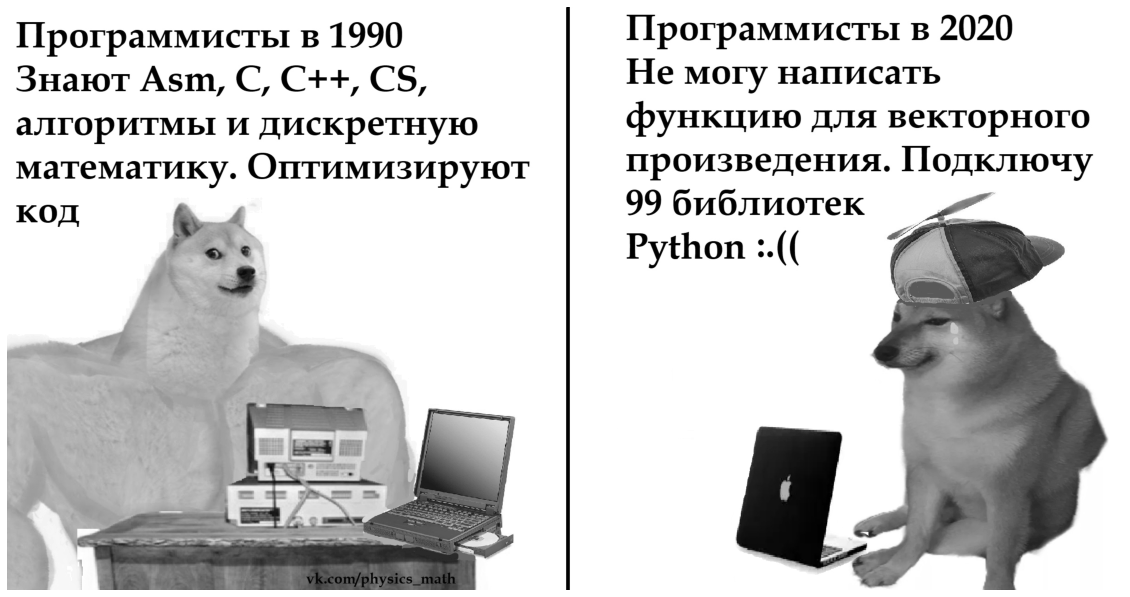

In [88]:
plt.figure(figsize=(20, 15))
plt.imshow(answer_2, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

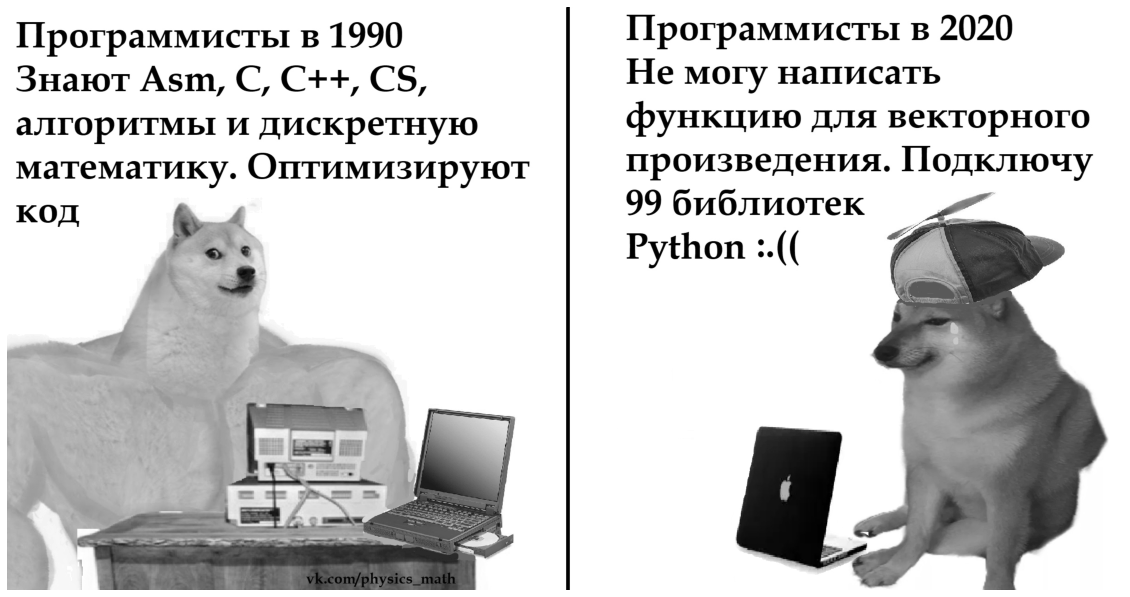

In [89]:
plt.figure(figsize=(20, 15))
plt.imshow(answer_3, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

## Conclusion

Стоит отметить меньшее время работы для функции с частичной векторизацией вычислений вне зависимости от размера изображения.   
По всей, видимости, это вызвано особенностью работы функции np.dot() или тем, что слайсинг массивов с дальйнешим перемножением на константу выполняется быстрее.

# Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.
Пример: x = np.array([2, 2, 2, 3, 3, 3, 5]). Ответ: (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [90]:
# Check correct answer function
def wrapperSoluton_7(answer_1, answer_2, answer_3):
    st_1 = np.array_equal(answer_1[0], answer_2[0]) and np.array_equal(answer_1[1], answer_2[1])
    st_2 = np.array_equal(answer_1[0], answer_3[0]) and np.array_equal(answer_1[1], answer_3[1])
    st_3 = np.array_equal(answer_2[0], answer_3[0]) and np.array_equal(answer_2[1], answer_3[1])

    if st_1 and st_2 and st_3:
        print(f"EVERYTHING IS OK")
        print(f"\t1) Full_Vectorisation = {answer_1};\n\t2) Normal_Solution = {answer_2};\n\t3) Partial_Vectorisation = {answer_3}.")
    else:
        print(f"FAIL. THERE IS A MISTAKE")
        print(f"\t1) Full_Vectorisation = {answer_1};\n\t2) Normal_Solution = {answer_2};\n\t3) Partial_Vectorisation = {answer_3}.")

In [91]:
def data_generation(vector_size):
    # Задание вектора
    x = np.random.randint(1, 6, size = vector_size)
    print("Вектор чисел: \n", x, end='\n')
    return x

In [92]:
def solution_performace(X, full_vectorisation, normal, partiral_vectorisation, wrapperSoluton):
    
    print("Full vectorisation case: ")
    %timeit full_vectorisation(X)
    answer_1 = full_vectorisation(X)
    print()

    print("Normal case: ")
    %timeit normal(X)
    answer_2 = normal(X)
    print()

    print("Partial vectorisation case: ")
    %timeit partiral_vectorisation(X)
    answer_3 = partiral_vectorisation(X)
    print()

    wrapperSoluton(answer_1, answer_2, answer_3)

In [93]:
# Full vectorisation solution using only numpy.array methods
def full_vectorisation_7(X):
    len_X = len(X)
    unequal_pairwase = (X[1:] != X[:-1])
    run_index = np.append(np.where(unequal_pairwase), len_X - 1)
    run_lengths = np.diff(np.append(-1, run_index))
    run_position = np.cumsum(np.append(0, run_lengths))[:-1]

    return (X[run_index], run_lengths)

In [94]:
def normal_7(X):
    count = 0
    a_encode = []
    a_count_el = []

    for i in range(len(X)-1):        
        if X[i] == X[i+1]:
            count += 1
        else:
            count += 1
            a_encode.append(X[i])
            a_count_el.append(count)
            count = 0

    count += 1
    a_encode.append(X[i+1])
    a_count_el.append(count)
    out = (np.array(a_encode), np.array(a_count_el))

    return out

In [95]:
# Using Python itertools and Python generators
from itertools import groupby
def partiral_vectorisation_7(x):
    a = np.ravel([[key, len(tuple(group))] for key, group in groupby(x)])
    return (a[::2], a[1::2])

## Data generation

### Задание вектора малого размера

In [96]:
X_small = data_generation(7)

Вектор чисел: 
 [2 3 4 1 5 4 1]


In [98]:
print("Full vectorisation case: ")
%timeit full_vectorisation_7(X_small)
answer_1 = full_vectorisation_7(X_small)
print()

print("Normal case: ")
%timeit normal_7(X_small)
answer_2 = normal_7(X_small)
print()

print("Partial vectorisation case: ")
%timeit partiral_vectorisation_7(X_small)
answer_3 = partiral_vectorisation_7(X_small)
print()

wrapperSoluton_7(answer_1, answer_2, answer_3)

Full vectorisation case: 
24.1 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Normal case: 
4.74 µs ± 604 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Partial vectorisation case: 
9.06 µs ± 318 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = (array([2, 3, 4, 1, 5, 4, 1]), array([1, 1, 1, 1, 1, 1, 1]));
	2) Normal_Solution = (array([2, 3, 4, 1, 5, 4, 1]), array([1, 1, 1, 1, 1, 1, 1]));
	3) Partial_Vectorisation = (array([2, 3, 4, 1, 5, 4, 1]), array([1, 1, 1, 1, 1, 1, 1])).


### Задание вектора среднего размера

In [102]:
X_average = data_generation(51)

Вектор чисел: 
 [5 5 5 5 1 1 4 5 2 4 5 1 2 4 2 5 3 2 2 1 5 2 5 1 5 1 1 4 5 3 4 1 3 2 2 4 3
 5 3 4 5 5 2 3 5 4 2 5 3 2 3]


In [103]:
print("Full vectorisation case: ")
%timeit full_vectorisation_7(X_average)
answer_1 = full_vectorisation_7(X_average)
print()

print("Normal case: ")
%timeit normal_7(X_average)
answer_2 = normal_7(X_average)
print()

print("Partial vectorisation case: ")
%timeit partiral_vectorisation_7(X_average)
answer_3 = partiral_vectorisation_7(X_average)
print()

wrapperSoluton_7(answer_1, answer_2, answer_3)

Full vectorisation case: 
26.1 µs ± 4.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Normal case: 
23.9 µs ± 733 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Partial vectorisation case: 
37.2 µs ± 3.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = (array([5, 1, 4, 5, 2, 4, 5, 1, 2, 4, 2, 5, 3, 2, 1, 5, 2, 5, 1, 5, 1, 4,
       5, 3, 4, 1, 3, 2, 4, 3, 5, 3, 4, 5, 2, 3, 5, 4, 2, 5, 3, 2, 3]), array([4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]));
	2) Normal_Solution = (array([5, 1, 4, 5, 2, 4, 5, 1, 2, 4, 2, 5, 3, 2, 1, 5, 2, 5, 1, 5, 1, 4,
       5, 3, 4, 1, 3, 2, 4, 3, 5, 3, 4, 5, 2, 3, 5, 4, 2, 5, 3, 2, 3]), array([4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]));
	3) Partial_Vectorisation = (array([5, 1, 4, 5, 2, 4, 5, 1,

### Задание вектора большого размера

In [104]:
X_large = data_generation(250)

Вектор чисел: 
 [3 3 2 5 1 5 2 1 1 1 4 2 4 1 4 4 2 3 4 4 1 1 1 5 4 1 2 5 3 4 4 2 3 3 5 4 1
 2 2 2 2 1 1 5 4 1 5 3 4 1 3 5 1 1 3 1 2 1 4 3 4 5 4 2 2 4 5 1 2 4 4 4 1 3
 5 3 5 5 4 2 4 1 5 2 5 5 4 2 2 5 2 2 4 3 1 3 2 5 1 1 5 1 5 1 3 1 4 5 1 5 4
 1 1 4 4 4 5 4 5 3 1 1 2 3 4 4 3 4 2 5 1 3 1 5 3 5 4 4 4 5 5 5 1 5 4 2 5 2
 4 5 1 1 2 1 1 1 4 1 3 5 1 1 1 3 1 1 5 3 3 1 3 2 3 3 3 4 4 4 3 2 3 1 2 4 5
 2 4 2 2 3 1 5 4 2 5 2 1 5 4 2 1 5 2 2 4 1 3 2 5 4 4 2 2 2 3 2 1 5 2 3 5 4
 2 5 4 3 1 2 1 3 5 5 3 3 2 4 1 1 5 5 2 3 1 2 5 5 1 5 5 4]


In [106]:
print("Full vectorisation case: ")
%timeit full_vectorisation_7(X_large)
answer_1 = full_vectorisation_7(X_large)
print()

print("Normal case: ")
%timeit normal_7(X_large)
answer_2 = normal_7(X_large)
print()

print("Partial vectorisation case: ")
%timeit partiral_vectorisation_7(X_large)
answer_3 = partiral_vectorisation_7(X_large)
print()

wrapperSoluton_7(answer_1, answer_2, answer_3)

Full vectorisation case: 
26.5 µs ± 744 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Normal case: 
126 µs ± 6.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Partial vectorisation case: 
175 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = (array([3, 2, 5, 1, 5, 2, 1, 4, 2, 4, 1, 4, 2, 3, 4, 1, 5, 4, 1, 2, 5, 3,
       4, 2, 3, 5, 4, 1, 2, 1, 5, 4, 1, 5, 3, 4, 1, 3, 5, 1, 3, 1, 2, 1,
       4, 3, 4, 5, 4, 2, 4, 5, 1, 2, 4, 1, 3, 5, 3, 5, 4, 2, 4, 1, 5, 2,
       5, 4, 2, 5, 2, 4, 3, 1, 3, 2, 5, 1, 5, 1, 5, 1, 3, 1, 4, 5, 1, 5,
       4, 1, 4, 5, 4, 5, 3, 1, 2, 3, 4, 3, 4, 2, 5, 1, 3, 1, 5, 3, 5, 4,
       5, 1, 5, 4, 2, 5, 2, 4, 5, 1, 2, 1, 4, 1, 3, 5, 1, 3, 1, 5, 3, 1,
       3, 2, 3, 4, 3, 2, 3, 1, 2, 4, 5, 2, 4, 2, 3, 1, 5, 4, 2, 5, 2, 1,
       5, 4, 2, 1, 5, 2, 4, 1, 3, 2, 5, 4, 2, 3, 2, 1, 5, 2, 3, 5, 4, 2,
       5, 4, 3, 1, 2, 1, 3, 5, 3, 2, 4, 1, 5, 2, 3, 1, 2, 5, 1, 5, 4]), array([2, 

## Conclusion

Аналогичная ситуация c задачами выше. Векторизованные методы отрабатывают быстрее невекторизованных на больших выборках данных. 

# Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. 
- Сравнить с функцией scipy.spatial.distance.cdist.

In [116]:
from scipy.spatial.distance import cdist

In [107]:
# Check correct answer function
def wrapperSoluton_8(answer_1, answer_2, answer_3, answer_4):
    if np.array_equal(answer_1, answer_2) == np.array_equal(answer_1, answer_3) == np.array_equal(answer_1, answer_4) == np.array_equal(answer_2, answer_3) == np.array_equal(answer_2, answer_4) == np.array_equal(answer_3, answer_4):
        print(f"EVERYTHING IS OK")
        print(f"\t1) Full_Vectorisation = \n{answer_1};\n\t2) Normal_Solution =\n {answer_2};\n\t3) Partial_Vectorisation =\n {answer_3};\n\t4) Scipy =\n {answer_4}.")
    else:
        print(f"FAIL. THERE IS A MISTAKE")
        print(f"\t1) Full_Vectorisation = {answer_1};\n\t2) Normal_Solution = {answer_2};\n\t3) Partial_Vectorisation = {answer_3};\n\t4) Scipy =\n {answer_4}.")

In [108]:
def data_generation(vector_size):
    matrix = []
    # Задание первого вектора
    x = np.random.randint(0, 10, size = vector_size)
    print("Коордианата x: \n", x, end='\n')
    # Задание второго вектора
    y = np.random.randint(0, 10, size = vector_size)
    print("Коордианата y: \n", y, end='\n')
    
    matrix = np.column_stack((x, y))
    print("Выборка объектов: ", matrix, sep='\n', end='\n')
    return matrix

In [109]:
def solution_performace(x, y, full_vectorisation, normal, partiral_vectorisation, wrapperSoluton):
    
    print("Full vectorisation case: ")
    %timeit full_vectorisation(x, y)
    answer_1 = full_vectorisation(x, y)
    print()

    print("Normal case: ")
    %timeit normal(x, y)
    answer_2 = normal(x, y)
    print()

    print("Partial vectorisation case: ")
    %timeit partiral_vectorisation(x, y)
    answer_3 = partiral_vectorisation(x, y)
    print()
    
    print("Scipy solution case: ")
    %timeit cdist(x, y)
    answer_4 = cdist(x, y)
    print()

    wrapperSoluton(answer_1, answer_2, answer_3, answer_4)

In [134]:
# Full vectorisation solution using only numpy.array methods
def full_vectorisation_8(X, Y):
    diff = X[np.newaxis, :] - Y[:, np.newaxis]
    return np.sqrt(np.sum(diff ** 2, axis = -1)).T

In [135]:
# Standard solution with using Python cycles
def normal_8(X, Y):
    euqlide_matrix = []
    euqlide_dist = 0
    for point_1 in X:
        euqlide_matrix_row = []
        for point_2 in Y:
            euqlide_dist = ((point_1[0] - point_2[0]) ** 2 + (point_1[1] - point_2[1]) ** 2) ** 0.5
            euqlide_matrix_row.append(euqlide_dist)
        euqlide_matrix.append(euqlide_matrix_row)
    return np.array(euqlide_matrix)

In [136]:
# Using a complex number definition specific
def partiral_vectorisation_8(X, Y):
    z_point_X = np.array([complex(point[0], point[1]) for point in X])
    z_point_Y = np.array([complex(point[0], point[1]) for point in Y])
    mesh_x_axis, mesh_y_axis = np.meshgrid(z_point_X, z_point_Y)
    return abs(mesh_x_axis - mesh_y_axis).T

## Data generation

### Задание матрицы малого размера

In [128]:
X_small = data_generation(5)

Коордианата x: 
 [8 2 5 6 0]
Коордианата y: 
 [6 3 4 7 3]
Выборка объектов: 
[[8 6]
 [2 3]
 [5 4]
 [6 7]
 [0 3]]


In [129]:
Y_small = data_generation(5)

Коордианата x: 
 [3 7 4 5 4]
Коордианата y: 
 [0 6 5 1 6]
Выборка объектов: 
[[3 0]
 [7 6]
 [4 5]
 [5 1]
 [4 6]]


In [130]:
solution_performace(X_small, Y_small,
                    full_vectorisation_8, normal_8, partiral_vectorisation_8, wrapperSoluton_8)

Full vectorisation case: 
9.6 µs ± 380 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Normal case: 
84.5 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Partial vectorisation case: 
32.5 µs ± 752 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Scipy solution case: 
8.99 µs ± 550 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

EVERYTHING IS OK
	1) Full_Vectorisation = 
[[7.81024968 1.         4.12310563 5.83095189 4.        ]
 [3.16227766 5.83095189 2.82842712 3.60555128 3.60555128]
 [4.47213595 2.82842712 1.41421356 3.         2.23606798]
 [7.61577311 1.41421356 2.82842712 6.08276253 2.23606798]
 [4.24264069 7.61577311 4.47213595 5.38516481 5.        ]];
	2) Normal_Solution =
 [[7.81024968 1.         4.12310563 5.83095189 4.        ]
 [3.16227766 5.83095189 2.82842712 3.60555128 3.60555128]
 [4.47213595 2.82842712 1.41421356 3.         2.23606798]
 [7.61577311 1.41421356 2.82842712 6.08276253 2.23606798]
 [4.24264069 7.615773

### Задание матрицы среднего размера

In [137]:
X_average = data_generation(15)

Коордианата x: 
 [1 1 4 0 9 3 9 4 1 4 9 3 7 0 4]
Коордианата y: 
 [9 0 9 9 3 7 0 1 0 6 1 0 5 5 9]
Выборка объектов: 
[[1 9]
 [1 0]
 [4 9]
 [0 9]
 [9 3]
 [3 7]
 [9 0]
 [4 1]
 [1 0]
 [4 6]
 [9 1]
 [3 0]
 [7 5]
 [0 5]
 [4 9]]


In [138]:
Y_average = data_generation(15)

Коордианата x: 
 [1 0 9 2 9 4 5 2 8 4 1 9 5 7 5]
Коордианата y: 
 [3 5 7 7 9 1 7 5 1 0 5 6 9 4 9]
Выборка объектов: 
[[1 3]
 [0 5]
 [9 7]
 [2 7]
 [9 9]
 [4 1]
 [5 7]
 [2 5]
 [8 1]
 [4 0]
 [1 5]
 [9 6]
 [5 9]
 [7 4]
 [5 9]]


In [ ]:
solution_performace(X_average, Y_average,
                    full_vectorisation_8, normal_8, partiral_vectorisation_8, wrapperSoluton_8)

Full vectorisation case: 
18.6 µs ± 2.21 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Normal case: 
699 µs ± 74 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Partial vectorisation case: 
53.1 µs ± 8.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Scipy solution case: 


### Задание матрицы большого размера

In [121]:
X_large = data_generation(101)

Коордианата x: 
 [9 1 9 3 0 3 9 4 8 0 4 1 8 5 1 2 7 0 2 9 0 7 0 4 3 6 4 7 0 4 3 2 4 9 2 7 2
 0 8 8 5 9 0 7 1 8 7 2 4 8 0 8 3 3 3 9 8 5 7 3 2 0 9 6 3 7 2 0 4 1 2 5 2 2
 5 4 9 8 0 2 2 5 7 2 2 5 7 5 9 2 3 0 7 3 5 2 5 8 8 9 2]
Коордианата y: 
 [2 3 6 2 9 7 7 5 3 4 1 5 2 5 4 1 4 4 8 7 6 2 9 3 5 2 8 7 5 3 6 2 9 7 0 2 4
 4 9 1 9 7 4 6 6 4 7 8 3 3 7 0 3 5 3 5 4 8 9 8 3 3 7 9 3 1 1 0 4 5 8 4 5 5
 2 3 0 3 0 4 7 7 4 9 1 5 0 6 3 4 5 0 8 9 3 7 4 7 0 7 3]
Выборка объектов: 
[[9 2]
 [1 3]
 [9 6]
 [3 2]
 [0 9]
 [3 7]
 [9 7]
 [4 5]
 [8 3]
 [0 4]
 [4 1]
 [1 5]
 [8 2]
 [5 5]
 [1 4]
 [2 1]
 [7 4]
 [0 4]
 [2 8]
 [9 7]
 [0 6]
 [7 2]
 [0 9]
 [4 3]
 [3 5]
 [6 2]
 [4 8]
 [7 7]
 [0 5]
 [4 3]
 [3 6]
 [2 2]
 [4 9]
 [9 7]
 [2 0]
 [7 2]
 [2 4]
 [0 4]
 [8 9]
 [8 1]
 [5 9]
 [9 7]
 [0 4]
 [7 6]
 [1 6]
 [8 4]
 [7 7]
 [2 8]
 [4 3]
 [8 3]
 [0 7]
 [8 0]
 [3 3]
 [3 5]
 [3 3]
 [9 5]
 [8 4]
 [5 8]
 [7 9]
 [3 8]
 [2 3]
 [0 3]
 [9 7]
 [6 9]
 [3 3]
 [7 1]
 [2 1]
 [0 0]
 [4 4]
 [1 5]
 [2 8]
 [5 4]
 [2 5]
 [2 5]
 [5 2]
 [4 3]
 [9

In [122]:
Y_large = data_generation(101)

Коордианата x: 
 [1 5 1 4 1 2 5 0 5 2 6 1 5 7 0 8 4 4 4 5 1 5 3 7 8 8 7 2 9 3 0 8 4 5 2 9 7
 6 0 9 4 9 8 5 7 9 0 9 6 2 8 5 4 7 7 2 1 1 4 9 6 7 9 7 7 9 2 1 3 0 2 8 6 6
 0 6 9 6 3 6 7 2 9 1 6 4 4 4 6 8 7 5 6 8 5 0 3 7 6 2 9]
Коордианата y: 
 [2 2 0 9 0 5 0 4 3 4 6 5 8 5 8 3 0 0 9 6 2 1 5 5 6 4 7 6 1 0 8 4 4 9 3 1 4
 1 6 8 8 5 0 5 4 3 5 5 5 1 6 3 8 9 1 4 3 8 3 7 7 5 5 7 9 8 4 0 0 1 9 9 4 3
 0 3 3 9 3 0 8 2 3 4 6 5 4 7 0 6 5 4 6 2 0 8 1 9 2 7 9]
Выборка объектов: 
[[1 2]
 [5 2]
 [1 0]
 [4 9]
 [1 0]
 [2 5]
 [5 0]
 [0 4]
 [5 3]
 [2 4]
 [6 6]
 [1 5]
 [5 8]
 [7 5]
 [0 8]
 [8 3]
 [4 0]
 [4 0]
 [4 9]
 [5 6]
 [1 2]
 [5 1]
 [3 5]
 [7 5]
 [8 6]
 [8 4]
 [7 7]
 [2 6]
 [9 1]
 [3 0]
 [0 8]
 [8 4]
 [4 4]
 [5 9]
 [2 3]
 [9 1]
 [7 4]
 [6 1]
 [0 6]
 [9 8]
 [4 8]
 [9 5]
 [8 0]
 [5 5]
 [7 4]
 [9 3]
 [0 5]
 [9 5]
 [6 5]
 [2 1]
 [8 6]
 [5 3]
 [4 8]
 [7 9]
 [7 1]
 [2 4]
 [1 3]
 [1 8]
 [4 3]
 [9 7]
 [6 7]
 [7 5]
 [9 5]
 [7 7]
 [7 9]
 [9 8]
 [2 4]
 [1 0]
 [3 0]
 [0 1]
 [2 9]
 [8 9]
 [6 4]
 [6 3]
 [0 0]
 [6 3]
 [9

In [ ]:
solution_performace(X_large, Y_large,
                    full_vectorisation_8, normal_8, partiral_vectorisation_8, wrapperSoluton_8)

## Conclusion

Аналогичная ситуация c задачами выше. Векторизованные методы отрабатывают быстрее невекторизованных. 
При этом встроенная функция scipe...cdist() дает хороший результат только на маленьких выборках данных.

# BackUp

## Замечание.  Можно считать, что все указанные объекты непустые (к примеру, в задаче №1 на диагонали матрицы есть ненулевые элементы).
Полезные функции NumPy: np.zeros, np.ones, np.diag, np.eye, np.arange, np.linspace, np.meshgrid,
np.random.random, np.random.randint, np.shape, np.reshape, np.transpose, np.any, np.all, np.nonzero, np.where,
np.sum, np.cumsum, np.prod, np.diff, np.min, np.max, np.minimum, np.maximum, np.argmin, np.argmax, np.unique,
np.sort, np.argsort, np.bincount, np.ravel, np.newaxis, np.dot, np.linalg.inv, np.linalg.solve.
Многие из этих функций можно использовать так: x.argmin().

## Для каждой из задач:
(a) Написать на Python + NumPy несколько вариантов кода различной эффективности. Должно быть не
менее трёх вариантов, в том числе как минимум один полностью векторизованный вариант, и один
вариант без векторизации. Третий вариант решения — на ваше усмотрение, например, это может быть
наиболее хорошо читаемый способ решения, или частично векторизованный вариант. Все варианты
решения одной задачи должны содержаться в отдельном Python модуле.

(b) Сравнить в IPython Notebook при помощи %timeit скорость работы на нескольких тестовых наборах
разного размера (минимум 3).

(c) Проанализировать полученные данные о скорости работы разных реализаций.

(d) Получить выводы.

Work was done by Artyom Ustsov - ML-11.  
__All rigths reserved__